In [60]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Training & Vizualizing a Decision tress - Iris data set

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth =2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [4]:
import graphviz 
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_clf, 
    out_file = image_path('iris_tree.dot'),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded=True,
    filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

ModuleNotFoundError: No module named 'graphviz'

The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. 

Saving figure iris_tree


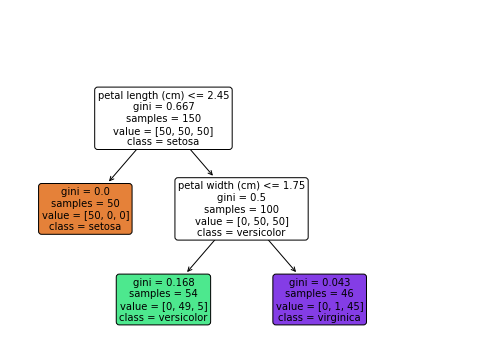

In [28]:
fig = plt.figure(figsize=(7, 5))
_=sklearn.tree.plot_tree(tree_clf , feature_names= iris.feature_names[2:], 
                 class_names= iris.target_names,
                 rounded=True, filled=True, fontsize =10)
save_fig('iris_tree')
plt.show()

Textual representation of DT

In [29]:
text_representation =sklearn.tree.export_text(tree_clf )
print(text_representation)

|--- feature_0 <= 2.45
|   |--- class: 0
|--- feature_0 >  2.45
|   |--- feature_1 <= 1.75
|   |   |--- class: 1
|   |--- feature_1 >  1.75
|   |   |--- class: 2



Saving figure decision_tree_decision_boundaries_plot


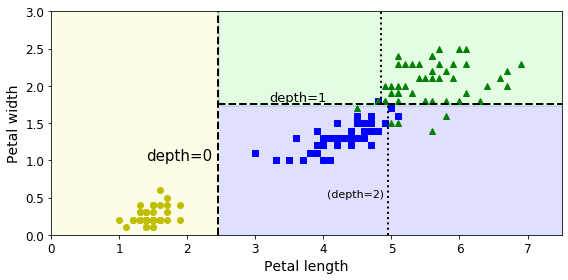

In [30]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend= False, plot_training = True):
    x1s= np.linspace(axes[0], axes[1], 100)
    x2s= np.linspace(axes[2], axes[3], 100)
    x1, x2  = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred= clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2, y_pred, alpha=0.3, cmap=custom_cmap) #colored section
    if not iris:
        custom_cmap2= ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2, y_pred, cmap= custom_cmap2, alpha=0.8)
    if plot_training:#datapoints
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X,y)

plt.plot([2.45,2.45], [0,3], 'k--', linewidth=2)
plt.plot([2.45,7.5], [1.75,1.75], 'k--', linewidth=2)
plt.plot([4.95,4.95], [0,1.75], 'k:', linewidth=2)
plt.plot([4.85,4.85], [1.75,3], 'k:', linewidth=2)
plt.text(1.40, 1.0, 'depth=0', fontsize=15)
plt.text(3.2, 1.8, 'depth=1', fontsize=13)
plt.text(4.05, 0.5, '(depth=2)', fontsize=11)
save_fig('decision_tree_decision_boundaries_plot')
plt.show()

In [31]:
#Predicting classes and class probabilities
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [32]:
tree_clf.predict([[5,1.5]])

array([1])

##### High Variance:
We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree. Now let's show that training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. To show this, we will set random_state to a different value than earlier:

In [33]:
#Sensitivity 
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [35]:
text_representation =sklearn.tree.export_text(tree_clf_tweaked )
print(text_representation)

|--- feature_1 <= 0.80
|   |--- class: 0
|--- feature_1 >  0.80
|   |--- feature_1 <= 1.75
|   |   |--- class: 1
|   |--- feature_1 >  1.75
|   |   |--- class: 2



Saving figure decision_tree_instability_plot


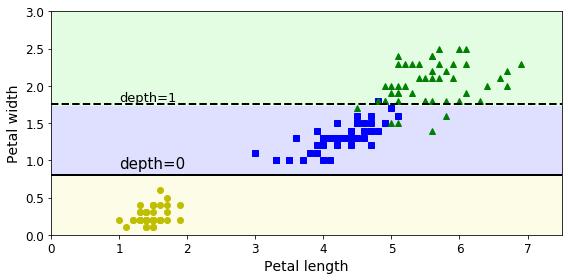

In [14]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0,7.5], [0.8,0.8], 'k-', linewidth=2)
plt.plot([0,7.5], [1.75,1.75], 'k--', linewidth=2)
plt.text(1.0, 0.9, 'depth=0', fontsize=15)
plt.text(1.0, 1.8, 'depth=1', fontsize=13)
save_fig('decision_tree_instability_plot')
plt.show()

In [37]:
# DT on Moon dataset
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [38]:
text_representation =sklearn.tree.export_text(deep_tree_clf1 )
print(text_representation)

|--- feature_1 <= -0.09
|   |--- feature_0 <= 1.19
|   |   |--- class: 1
|   |--- feature_0 >  1.19
|   |   |--- feature_1 <= -0.43
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.43
|   |   |   |--- class: 1
|--- feature_1 >  -0.09
|   |--- feature_0 <= 1.36
|   |   |--- feature_0 <= -0.38
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.38
|   |   |   |--- feature_0 <= 0.47
|   |   |   |   |--- feature_1 <= 0.77
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.77
|   |   |   |   |   |--- feature_0 <= -0.16
|   |   |   |   |   |   |--- feature_0 <= -0.19
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  -0.19
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  -0.16
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.47
|   |   |   |   |--- feature_1 <= 0.05
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.05
|   |   |   |   |   |--- feature_0 <= 0.64


In [39]:
text_representation =sklearn.tree.export_text(deep_tree_clf2 )
print(text_representation)

|--- feature_1 <= -0.09
|   |--- feature_0 <= 1.19
|   |   |--- class: 1
|   |--- feature_0 >  1.19
|   |   |--- feature_1 <= -0.29
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.29
|   |   |   |--- class: 1
|--- feature_1 >  -0.09
|   |--- feature_0 <= 1.36
|   |   |--- feature_0 <= -0.38
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.38
|   |   |   |--- feature_0 <= 0.47
|   |   |   |   |--- feature_1 <= 0.77
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.77
|   |   |   |   |   |--- feature_0 <= -0.16
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -0.16
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.47
|   |   |   |   |--- feature_0 <= 0.64
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.64
|   |   |   |   |   |--- feature_1 <= 0.48
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  0.48
|   |   |   |   |   |   |--- class: 0
|   |--- feature_0 >  1

Saving figure min_sample_leaf_plot


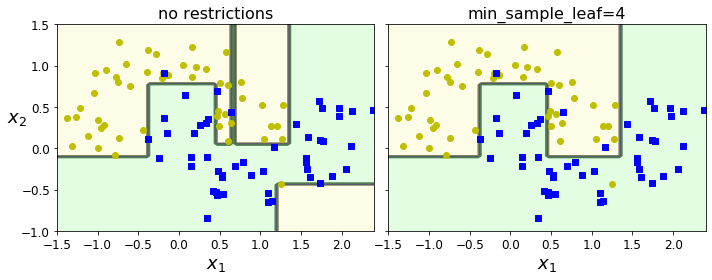

In [40]:
fig,axes = plt.subplots(ncols=2, figsize=(10,4), sharey= True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm,ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('no restrictions', fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm,ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('min_sample_leaf={}'.format(deep_tree_clf2.min_samples_leaf), fontsize=16)
plt.ylabel('')

save_fig('min_sample_leaf_plot')
plt.show()
# left plot - overfitting; Right-plot = generalize better

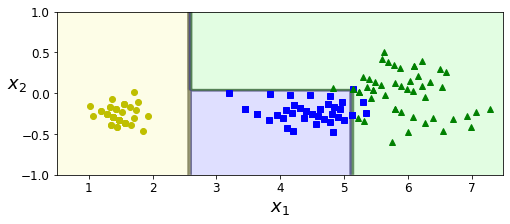

In [42]:
angle=np.pi/180*20
rotation_matrix=np.array([[np.cos(angle), -np.sin(angle)], [np.single(angle),np.cos(angle)]])
Xr=X.dot(rotation_matrix)

tree_clf_r= DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr,y)

plt.figure(figsize=(8,3))
plot_decision_boundary(tree_clf_r, Xr, y, axes = [0.5, 7.5, -1.0, 1], iris = False)
plt.show()

In [43]:
text_representation =sklearn.tree.export_text(tree_clf_r)
print(text_representation)

|--- feature_0 <= 2.56
|   |--- class: 0
|--- feature_0 >  2.56
|   |--- feature_0 <= 5.13
|   |   |--- feature_1 <= 0.03
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.03
|   |   |   |--- class: 2
|   |--- feature_0 >  5.13
|   |   |--- feature_0 <= 5.36
|   |   |   |--- feature_0 <= 5.33
|   |   |   |   |--- feature_0 <= 5.30
|   |   |   |   |   |--- feature_0 <= 5.26
|   |   |   |   |   |   |--- feature_0 <= 5.18
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_0 >  5.18
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  5.26
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.30
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  5.33
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  5.36
|   |   |   |--- class: 2



Saving figure sensitivity_to_roation_plot


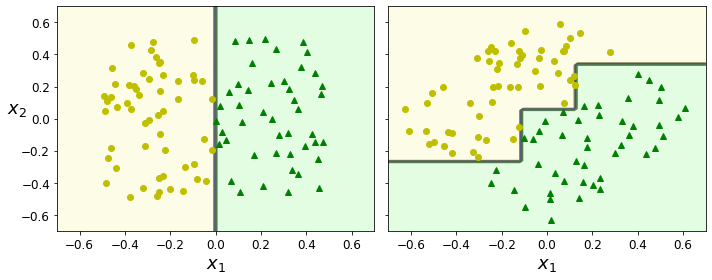

In [24]:
#Random dataset- figure 6-7: Instability
np.random.seed(6)
Xs = np.random.rand(100,2) - 0.5
ys=(Xs[:,0] > 0).astype(np.float32)*2

angle = np.pi/4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr=Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig,axes = plt.subplots(ncols=2, figsize=(10,4), sharey= True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes = [-0.7, 0.7, -0.7, 0.7], iris = False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes = [-0.7, 0.7, -0.7, 0.7], iris = False)
plt.ylabel('')
save_fig('sensitivity_to_roation_plot')
plt.show()

##### Regression Trees

In [61]:
#Qudratic random training set + noise
np.random.seed(42)
m=200
X = np.random.rand(m,1)
y = 4*(X - 0.5)**2
y = y + np.random.randn(m,1)/10

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth =2, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Saving figure tree_reg_plot


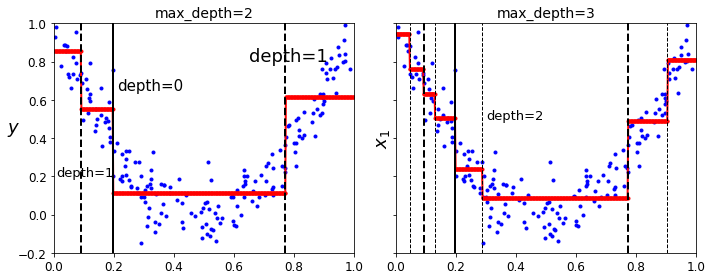

In [63]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

def plot_reg_predictions(tree_reg, X, y, axes = [0,1,-0.2,1], ylabel='$y$'):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.ylabel('$x_1$', fontsize = 18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X,y, 'b.')
    plt.plot(x1, y_pred, 'r.-', linewidth=2, label=r'$\hat{y}$')
    
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_reg_predictions(tree_reg1, X, y)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2,1], style, linewidth=2)

plt.text(0.21, 0.65, 'depth=0', fontsize=15)
plt.text(0.01, 0.2, 'depth=1', fontsize=13)
plt.text(0.65, 0.8, 'depth=1', fontsize=18)
plt.title('max_depth=2', fontsize=14)

plt.sca(axes[1])
plot_reg_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2,1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2,1], style, linewidth=1)
plt.text(0.3, 0.5, 'depth=2', fontsize=13)
plt.title('max_depth=3', fontsize=14)

save_fig('tree_reg_plot')
plt.show()

In [32]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [33]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

NameError: name 'Source' is not defined

Saving figure tree_reg1


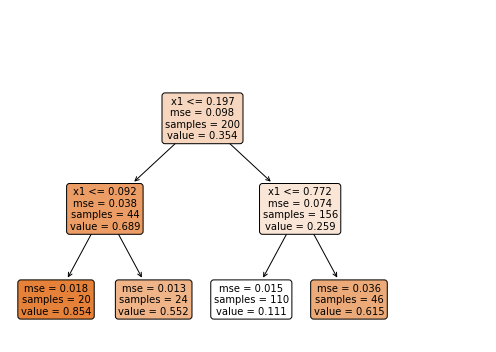

In [66]:
fig = plt.figure(figsize=(7, 5))
plt.tight_layout()
_=sklearn.tree.plot_tree(tree_reg1 , feature_names= ['x1'], 
                 rounded=True, filled=True, fontsize =10)
save_fig('tree_reg1')
plt.show()

Saving figure tree_reg2


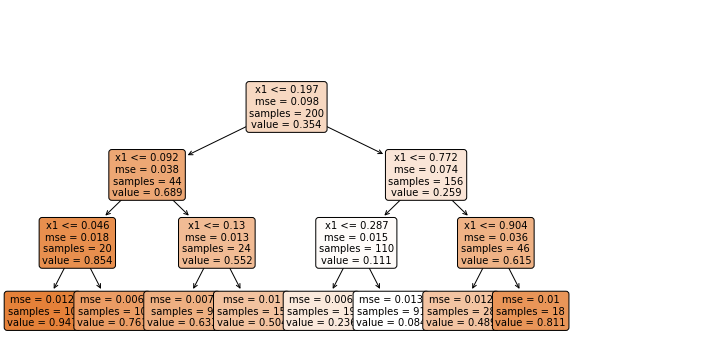

In [70]:
fig = plt.figure(figsize=(10,5))
_=sklearn.tree.plot_tree(tree_reg2 , feature_names= ['x1'],
                 rounded=True, filled=True, fontsize =10)
save_fig('tree_reg2')
plt.show()

Saving figure tree_reg_regularization_plot


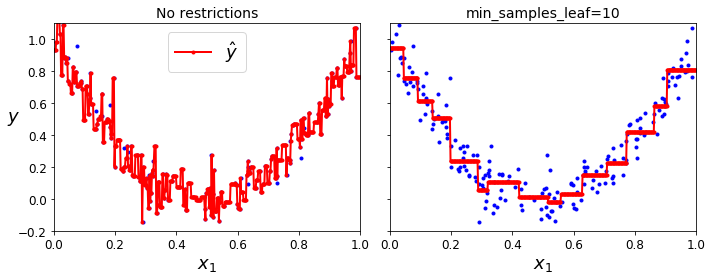

In [39]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

x1 = np.linspace(0,1, 500).reshape(-1,1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)
    
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred1, 'r.-', linewidth=2, label = r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.legend(loc='upper center', fontsize=18)
plt.title('No restrictions', fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred2, 'r.-', linewidth=2, label = r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.title('min_samples_leaf={}'.format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig('tree_reg_regularization_plot')
plt.show()

##### Exercise 7 - make moons

In [44]:
from sklearn.datasets import make_moons
X, y =  make_moons(n_samples = 10000, noise =0.4, random_state=42)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    7.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [48]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [49]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

##### Exercise 8 - Growing a forest

In [50]:
#splitting dat into 1000 subsets each containing 100 instances using ShuffleSplit; 
from sklearn.model_selection import ShuffleSplit
n_trees = 1000
n_instances = 100

mini_sets = []
rs = ShuffleSplit(n_splits = n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [52]:
len(mini_sets)

1000

In [53]:
rs.split(X_train)

<generator object BaseShuffleSplit.split at 0x0000024991667A48>

In [54]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))


np.mean(accuracy_scores)

0.8054499999999999

In [55]:
forest

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=17,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=17,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_l

In [56]:
#majority vote prediction - hard voting ensemble

In [61]:
Y_pred = np.empty([n_trees, len(X_test)], dtype = np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [62]:
from scipy.stats import mode
y_pred_majority_votes, n_votes = mode(Y_pred, axis =0)

In [64]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872